In [4]:
import sys
import os

# Get the absolute path to src/ and add it to sys.path
sys.path.append(os.path.abspath("../src"))

In [5]:

import utils

In [28]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Path to your saved dataset
file_path = "../data/2pl_simulation_3000person_60item_3ability/simulation.pth"

# Load the dataset
dataset = torch.load(file_path)

# Check what's inside
print(dataset.keys())  # Expected: ['response', 'ability', 'item_feat']


dict_keys(['response', 'ability', 'item_feat'])


In [38]:
print(dataset['response'].shape)
print(dataset['ability'].shape)
print(dataset['item_feat'].shape)

torch.Size([3000, 60, 1])
torch.Size([3000, 3])
torch.Size([60, 4])


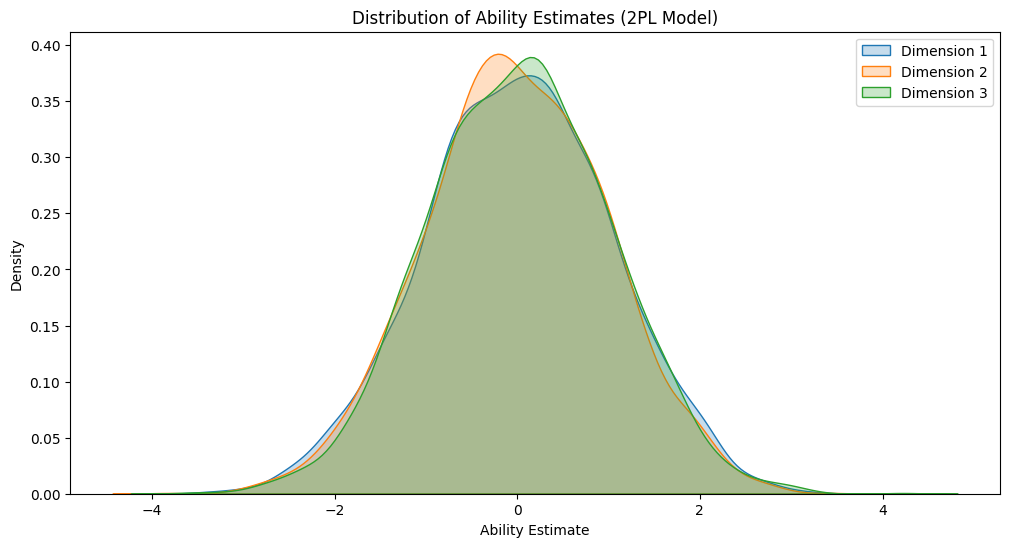

In [8]:
ability = dataset["ability"].numpy()  # Convert to NumPy for visualization

# Plot histograms for each dimension of ability estimates
plt.figure(figsize=(12, 6))
for dim in range(ability.shape[1]):
    sns.kdeplot(ability[:, dim], label=f"Dimension {dim+1}", fill=True)

plt.xlabel("Ability Estimate")
plt.ylabel("Density")
plt.title("Distribution of Ability Estimates (2PL Model)")
plt.legend()
plt.show()

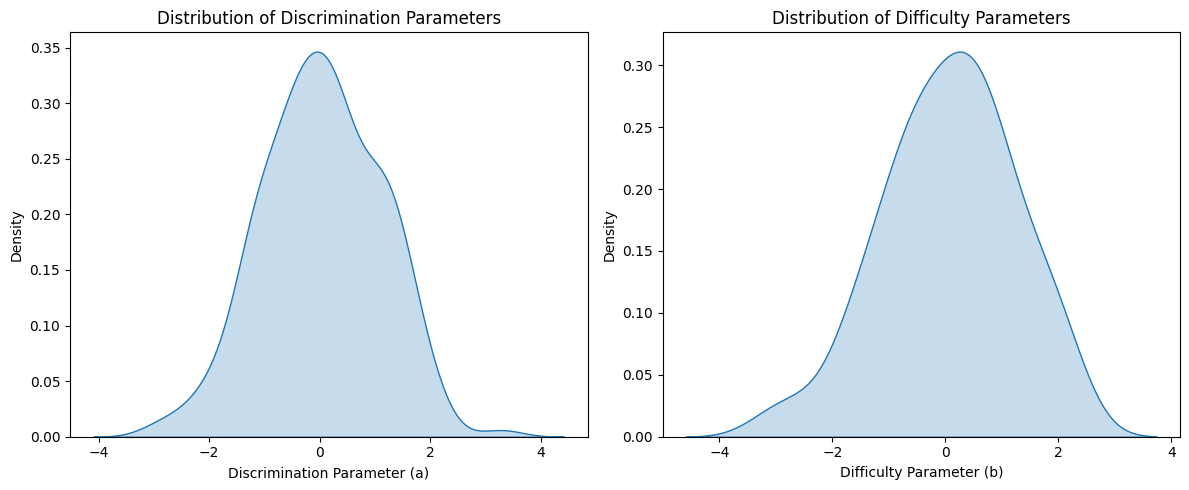

In [9]:
# Extract item features
item_feat = dataset["item_feat"].numpy()  # Convert PyTorch tensor to NumPy

# Determine ability dimensions (discrimination should be first `ability_dim` columns)
ability_dim = item_feat.shape[1] - 1  # Last column is difficulty

# Extract discrimination and difficulty
discrimination = item_feat[:, :ability_dim].flatten()  # Flatten to 1D array
difficulty = item_feat[:, ability_dim]  # Last column

# Plot distributions for discrimination and difficulty
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Discrimination parameter distribution
sns.kdeplot(discrimination, ax=axes[0], fill=True)
axes[0].set_xlabel("Discrimination Parameter (a)")
axes[0].set_ylabel("Density")
axes[0].set_title("Distribution of Discrimination Parameters")

# Difficulty parameter distribution
sns.kdeplot(difficulty, ax=axes[1], fill=True)
axes[1].set_xlabel("Difficulty Parameter (b)")
axes[1].set_ylabel("Density")
axes[1].set_title("Distribution of Difficulty Parameters")

plt.tight_layout()
plt.show()

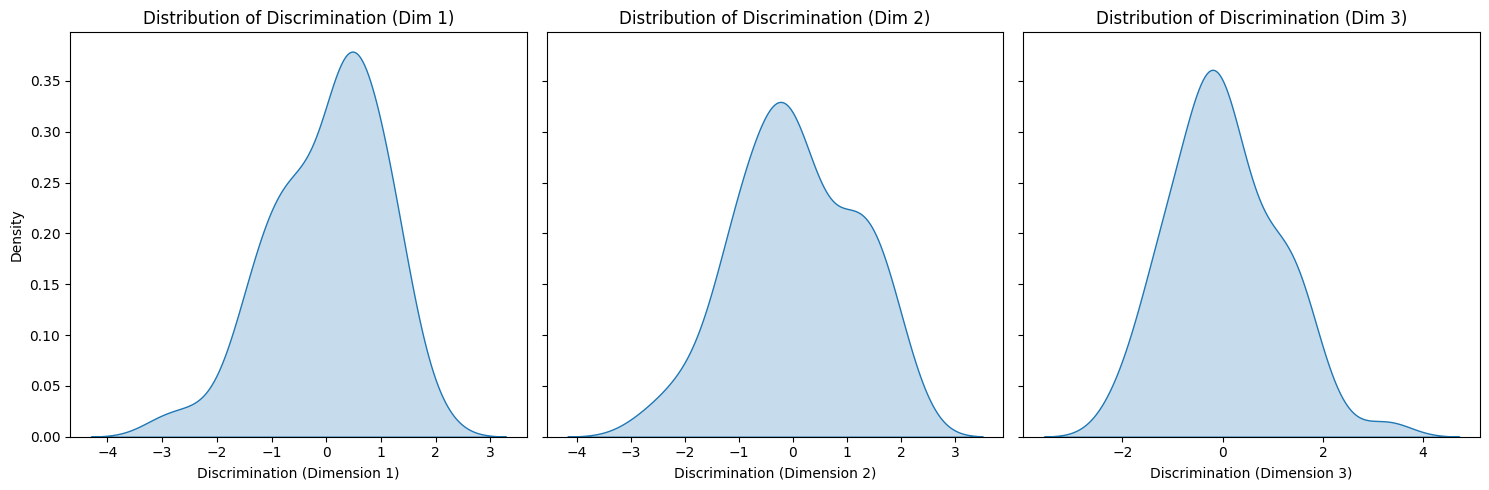

In [ ]:
# Extract discrimination parameters (each column is a different dimension)
discrimination = item_feat[:, :ability_dim]

# Ensure discrimination is 2D (even if only one dimension)
if discrimination.ndim == 1:
    discrimination = discrimination[:, np.newaxis]

# Create subplots for each discrimination dimension
fig, axes = plt.subplots(1, ability_dim, figsize=(5 * ability_dim, 5), sharey=True)

# If only one ability dimension, make `axes` a list for consistent indexing
if ability_dim == 1:
    axes = [axes]

# Plot each discrimination dimension separately
for i in range(ability_dim):
    sns.kdeplot(discrimination[:, i], ax=axes[i], fill=True)
    axes[i].set_xlabel(f"Discrimination (Dimension {i+1})")
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Distribution of Discrimination (Dim {i+1})")

plt.tight_layout()
plt.show()

### Save the data for fitting in R::mirt

In [30]:
# Extract response data
responses = dataset["response"].numpy().squeeze()  # Convert PyTorch tensor to NumPy

# Convert to a DataFrame and save
df = pd.DataFrame(responses)
df.to_csv("../data/2pl_simulation_3000person_60item_3ability/responses.csv", index=False)

print("Response data saved as responses.csv")

Response data saved as responses.csv


In [31]:
discrimination

array([[-1.30671573e+00,  1.55577672e+00,  8.55266750e-02],
       [ 1.33159745e+00, -1.89356589e+00, -3.65030646e-01],
       [ 8.99719119e-01, -8.76993597e-01,  1.66738197e-01],
       [-5.65235496e-01, -1.06681240e+00,  1.60575068e+00],
       [-9.69132304e-01,  1.29071975e+00, -6.13540784e-02],
       [ 7.59781718e-01,  1.07222080e+00,  7.17102408e-01],
       [-5.83148837e-01,  1.87378049e+00, -1.21539605e+00],
       [ 4.09295782e-02, -6.26071692e-01, -1.57562196e+00],
       [-9.86260355e-01,  1.03580582e+00, -6.48970187e-01],
       [ 9.82667625e-01, -1.14915884e+00,  9.87777293e-01],
       [ 2.30379164e-01, -2.20964074e+00,  3.28966737e+00],
       [-2.38553619e+00,  1.07920885e+00, -1.30683827e+00],
       [ 2.65920013e-01,  1.11205429e-02, -1.03255188e+00],
       [ 3.65748107e-01, -3.16506714e-01, -1.20514333e+00],
       [ 6.03411734e-01,  1.16301930e+00, -3.19216698e-01],
       [-3.29953462e-01,  2.43608326e-01,  2.00297624e-01],
       [-2.96052074e+00, -6.94493651e-02